<a href="https://colab.research.google.com/github/hida0/ESAA/blob/HW/Week10_HW2_XGB_LightGBM_Stacking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 개념 정리 & 필사
(파이썬 머신러닝 완벽가이드 ch4. 6~7, 10 pg. 227-251, 278-289)

### 1. **XGBoost**(eXtra Gradient Boost)
### 1-1. XGBoost 개요
- XGBoost는 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나이다.
- GBM에 기반하고 있지만, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제를 해결했다.

> - 뛰어난 예측 성능: 분류와 회귀 영역에서 뛰어난 예측 성능을 발휘한다.
  - GBM 대비 빠른 수행 시간: 병렬 수행 및 다양한 기능으로 GBM에 비해 빠른 수행 성능을 보장한다.
  - 과적합 규제: 자체의 과적합 규제 기능으로 과적합에 좀 더 강한 내구성을 가진다.
  - Tree pruning(나무 가지치기): 더 이상의 긍정 이득이 없는 분할을 가지치기 해서 분할 수를 더 줄인다.
  - 자체 내장된 교차 검증: 반복 수행 시마다 내부적으로 학습/평가 데이터 세트에 대한 교차 검증을 수행하여 최적화된 반복 수행 횟수를 가질 수 있다. 교차 검증을 통해 평가 데이터 세트의 평가 값이 최적화되면 반복을 중간에 멈출 수 있는 조기 중단 기능이 있다.
  - 결손값 자체 처리: 결손값을 자체적으로 처리할 수 있는 기능을 가지고 있다.

- 독자적인 XGBoost 프레임워크 기반의 XGBoost를 **파이썬 래퍼 XGBoost 모듈**, 사이킷런과 연동되는 모듈을 **사이킷런 래퍼 XGBoost 모듈**이라고 한다.
- XGBoost의 사이킷런 래퍼 클래스는 **`XGBClassifier`**와 **`XGBRegressor`**이다.
- 사이킷런 estimator의 학습을 위한 **`fit()`**과 **`predict()`**를 사용한다.

### 1. **XGBoost**(eXtra Gradient Boost)
### 1-2. 파이썬 래퍼 XGBoost 하이퍼 파라미터
- 파이썬 래퍼 XGBoost 모듈과 사이킷런과 연동되는 모듈의 일부 하이퍼 파라미터는 동일한 기능을 의미하지만, 사이킷런 파라미터의 범용화된 이름 규칙에 따라 파라미터 명이 달라진다.
- 파이썬 래퍼 XGBoost 하이퍼 파라미터를 **일반 파라미터**, **부스터 파라미터**, **학습 태스크 파라미터**로 나눌 수 있으며, 대부분의 하이퍼 파라미터는 부스터 파라미터에 속한다.

> 주요 일반 파라미터
 - `booster`: gbtree 또는 gblinear 중에 선택하며, 디폴트는 gbtree이다.
 - `silent`: 디폴트는 0이며, 출력 메시지를 나타내고 싶지 않을 경우 1로 설정한다.
 - `nthread`: CPU의 실행 스레드 개수를 조정하며, 디폴트는 CPU의 전체 스레드를 모두 사용한다.

> 주요 부스터 파라미터
 - `eta`: GBM의 학습률과 같은 파라미터로, 0과 1 사이의 값을 지정하며 부스팅 스텝을 반복적으로 수행할 때 업데이트 되는 학습률 값이다. 파이썬 xgboost에서는 디폴트가 0.3, 사이킷런 xgboost에서는 learning_rate 파라미터로 대체되며 디폴트는 0.1이다.
 - `num_boost_rounds`: GBM의 n_estimators와 같은 파라미터이다.
 - `min_child_weight`[default=1]: 과적합을 조절하기 위해 트리에서 추가적으로 가지를 나눌지 결정하기 위해 필요한 데이터들의 weight 총합으로, 클수록 분할을 자제한다.
 - `gamma`[default=0]: 트리의 리프 노드를 추가적으로 나눌지를 결정할 최소 손실 감소 값으로, 해당 값보다 큰 손실이 감소된 경우에 리프 노드를 분리한다.
 - `max_depth`[default=6]: 트리 기반 알고리즘의 max_depth와 같으며, 높을수록 특정 피처 조건에 특화되어 과적합 가능성이 높아지므로 보통 3~10 사이의 값을 적용한다.
 - `sub_sample`[default=1]: GBM의 subsample과 동일하며, 트리가 커져서 과적합되는 것을 제어하기 위해 데이터를 샘플링하는 비율을 지정한다. 
 - `colsample_bytree`[default=1]: GBM의 max_features와 유사하며, 트리 생성에 필요한 피처를 임의로 샘플링하는데 사용된다.
 - `lambda`[default=1]: L2 Regularization 적용 값이며, 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.
 - `alpha`[default=0]: L1 Regularization 적용 값이며, 피처 개수가 많을 경우 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다.
 - `sclae_pos_weight`[default=1]: 특정 값으로 치우친 비대칭 클래스로 구성된 데이터 세트의 균형을 유지하기 위한 파라미터이다.

> 학습 태스크 파라미터
 - `objective`: 최솟값을 가져야할 손실 함수를 정의하며, 이진 분류인지 다중 분류인지에 따라 사용되는 손실함수가 달라진다.
 - `binary:logistic`: 이진 분류일 때 적용한다.
 - `multi:softmax`: 다중 분류일 때 적용한다.
 - `multi:softprob`: multi:softmax와 유사하나 개별 레이블 클래스의 해당되는 예측 확률을 반환한다.
 - `eval_metric`: 검증에 사용되는 함수를 정의하며, 기본값으로 회귀는 rmse, 분류는 error를 사용한다.

- 파라미터 튜닝에 들이는 공수 대비 성능 향상 효과가 높지 않은 경우가 대부분이며, 파라미터를 튜닝하는 경우의 수는 여러 가지 상황에 따라 달라진다.
- 과적합 문제가 심각하다면 다음과 같은 적용을 고려할 수 있다.
 - eta 값을 낮추며, 동시에 num_round(n_estimators)는 높여준다.
 - max_depth 값을 낮춘다.
 - min_child_weight 값, gamma 값을 높인다.
 - subsample과 colsample_bytree를 조정하여 트리가 너무 복잡하게 생성되는 것을 막는다.

### 1. **XGBoost**(eXtra Gradient Boost)
### 1-2. 파이썬 래퍼 XGBoost 하이퍼 파라미터
- XGBoost는 자체적으로 **교차 검증**, **성능 평가**, **피처 중요도 등의 시각화** 기능을 가지고 있다.
- 수행 속도를 향상시키기 위한 대표적인 기능으로 **조기 중단 기능**이 있다.
- 기본 GBM과는 다르게 n_estimators에 지정한 부스팅 반복 횟수에 도달하지 않아도 예측 오류가 더이상 개선되지 않으면 수행을 중지하여 수행 시간을 개선할 수 있다.


### 1. **XGBoost**(eXtra Gradient Boost)
### 1-3. 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측
- 위스콘신 유방암 데이터 세트는 종양의 크기, 모양 등의 다양한 속성값을 기반으로 악성종양인지 양성종양인지 분류한 데이터 세트이다.
- XGBoost를 이용하여 위스콘신 유방암 데이터 세트에 기반해 종양의 다양한 피처에 따라 악성종양인지 일반 양성종양인지 예측한다.
- 위스콘신 유방암 데이터 세트는 사이킷런의 `load_breast_cancer()`를 호출하여 로드한다.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
X_features = dataset.data
y_label = dataset.target

import pandas as pd
cancer_df = pd.DataFrame(data=X_features, columns=dataset.feature_names)
cancer_df['target'] = y_label # 새로운 칼럼 추가
cancer_df.head(3)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0


In [ ]:
# 레이블 값의 분포를 확인
print(dataset.target_names)
print(cancer_df['target'].value_counts())

['malignant' 'benign']
1    357
0    212
Name: target, dtype: int64


In [ ]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)
print(X_train.shape, X_test.shape)

(455, 30) (114, 30)


### 1. **XGBoost**(eXtra Gradient Boost)
### 1-3. 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측
- 파이썬 래퍼 XGBoost는 사이킷런과 여러 차이가 있는데, 그 중 눈에 띄는 차이는 학습용과 테스트용 데이터 세트를 위해 별도의 객체인 **DMatrix**를 생성한다는 점이다.
- **DMatrix**는 주로 넘파이 입력 파라미터를 받아서 만들어지는 XGBoost만의 전용 데이터 세트로, 주요 입력 파라미터는 피처 데이터 세트인 **data**와 레이블 데이터 세트(분류) 또는 종속값 데이터 세트(회귀)인 **label**이다.

In [ ]:
# 넘파이 형태인 학습 데이터 세트와 테스트 데이터 세트를 DMatrix로 변환
import xgboost as xgb
dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test, label=y_test)

In [ ]:
# 하이퍼 파라미터 설정
params = { 
    'max_depth': 3,
    'eta': 0.1,
    'eval_metric': 'logloss',
    'early_stoppings': 100
    }
num_rounds = 400

### 1. **XGBoost**(eXtra Gradient Boost)
### 1-3. 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측
- 파이썬 래퍼 XGBoost는 **하이퍼 파라미터**를 **xgboost 모듈의 `train()` 함수**에 파라미터로 전달한다.
- 조기 중단은 xgboost의 train() 함수에 **`early_stopping_rounds`** 파라미터를 입력하여 설정하며, 반드시 **`eval_set`**과 **`eval_metric`**이 함께 설정되어야 한다.
- xgboost는 반복마다 **eval_set으로 지정된 데이터 세트**에서 **eval_metric의 지정된 평가 지표로 예측 오류를 측정**한다.
- 조기 중단을 수행하려면 반드시 **`evals`** 파라미터에 학습 데이터 세트와 평가 데이터 세트를 리스트 형태로 명기해야한다.
- xgboost 모듈의 train() 함수를 포출하면 학습을 수행하고, 이때 반복시마다 evals에 표시된 데이터 세트에 대해 평가 지표 결과가 출력된다.
- train()은 학습이 완료된 모델 객체를 반환하며, 이 모델 객체는 예측을 위해 **`predict`** 메서드를 이용한다.
- 예측 결과 클래스 값을 반환하는 사이킷런과는 다르게, xgboost의 predict()는 예측 결과값이 아닌 예측 결과를 추정할 수 있는 **확률 값을 반환**한다.
- 본 예제에서는 암이 악성인지 양성인지 판단하는 이진 분류이므로 예측 확률이 0.5보다 크면 1로, 0.5보다 작으면 0으로 예측 값을 결정하는 로직을 추가한다.

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

In [ ]:
# train 데이터 세트는 'train', evaluation(test) 데이터 세트는 'eval'로 명기한다.
wlist = [(dtrain, 'train'), (dtest, 'eval')]

# 하이퍼 파라미터와 early stopping 파라미터를 train() 함수의 파라미터로 전달
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds, early_stopping_rounds=100, evals=wlist)
# 학습이 완료된 모델 객체를 xgb_model로 반환

In [ ]:
import numpy as np
pred_probs = xgb_model.predict(dtest)
print('predict() 수행 결과값을 5개만 표시, 예측 확률 값으로 표시된다.')
print(np.round(pred_probs[:5], 3))

# 예측 확률이 0.5보다 크면 1로, 0.5보다 작으면 0으로 예측값을 결정하여 리스트 객체인 preds에 저장
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print("예측값 5개만 표시:", preds[:5])

predict() 수행 결과값을 5개만 표시, 예측 확률 값으로 표시된다.
[0.711 0.025 0.643 0.434 0.986]
예측값 5개만 표시: [1, 0, 1, 0, 1]


In [ ]:
# 평가 지표 유틸리티 함수를 이용하여 XGBoost 모델의 예측 성능 평가
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
def get_clf_eval(Y_test, pred, pred_proba):
    confusion = confusion_matrix(Y_test, pred)
    accuracy = accuracy_score(Y_test, pred)
    precision = precision_score(Y_test, pred)
    recall = recall_score(Y_test, pred)
    f1 = f1_score(Y_test, pred)
    roc_auc = roc_auc_score(Y_test, pred_proba)
    print("오차 행렬")
    print(confusion)
    print("정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC: {4:.4f}".format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, preds, pred_probs)

오차 행렬
[[35  2]
 [ 2 75]]
정확도: 0.9649, 정밀도: 0.9740, 재현율: 0.9740, F1: 0.9740, AUC: 0.9954


### 1. **XGBoost**(eXtra Gradient Boost)
### 1-3. 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측
- xgboost의 **`plot_importance()`** API는 피처의 중요도를 막대그래프 형식으로 나타낸다.
- 기본 평가 지표로 f1 스코어를 기반으로 하여 각 피처의 중요도를 나타낸다.
- **`plot_importance()`** 호출 시 파라미터로 **학습이 완료된 모델 객체** 및 맷플롯립의 **ax 객체**를 입력한다.
- 유의할 점은 xgboost 넘파이 기반의 피처 데이터로 학습 시에 피처명을 제대로 알 수 없으므로, 피처 순서별로 f자 뒤에 0부터 숫자를 붙인다. 즉 f0은 첫번째 피처, f1는 두번째 피처를 의미한다.

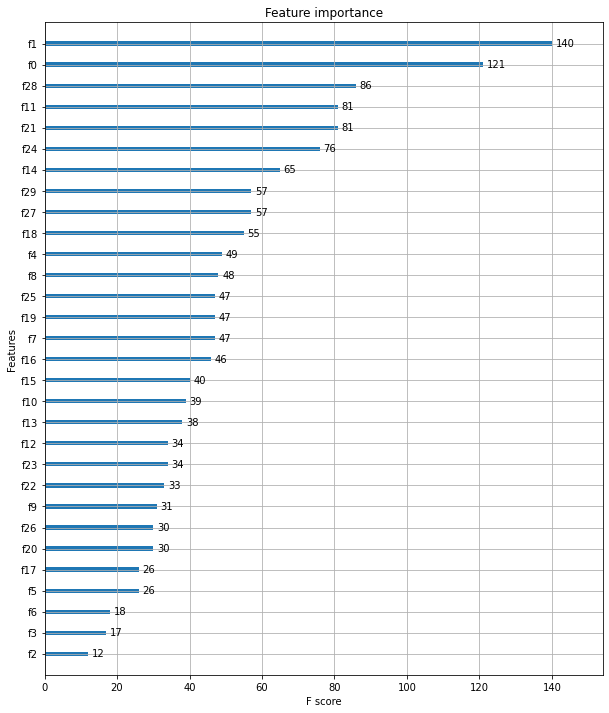

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax)

### 1. **XGBoost**(eXtra Gradient Boost)
### 1-3. 파이썬 래퍼 XGBoost 적용 - 위스콘신 유방암 예측
- 파이썬 래퍼 XGBoost는 사이킷런의 GridSearchCV와 유사하게 데이터 세트에 대한 교차 검증 수행 후 최적 파라미터를 구할 수 있는 방법을 **`cv()`** API로 제공한다.
- xgb.cv의 반환값은 DataFrame 형태이다.

In [ ]:
import xgboost
xgboost.cv(params, dtrain, num_boost_round=10, nfold=3, stratified=False, folds=None, metrics=(), obj=None, feval=None, maximize=False, early_stopping_rounds=None, fpreproc=None, as_pandas=True, verbose_eval=None, show_stdv=True, seed=0, callbacks=None, shuffle=True)

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.605549,0.000135,0.614361,0.006067
1,0.533250,0.000449,0.550111,0.009445
2,0.471100,0.000494,0.495012,0.011013
3,0.418431,0.001274,0.449264,0.012165
4,0.373621,0.002133,0.410919,0.013030
5,0.334924,0.002893,0.378416,0.013917
6,0.301022,0.003452,0.350128,0.015410
7,0.270806,0.003254,0.324949,0.017534
8,0.244407,0.003097,0.302211,0.016782
9,0.221220,0.003097,0.281800,0.016997


### 1. **XGBoost**(eXtra Gradient Boost)
### 1-4. 사이킷런 래퍼 XGBoost의 개요 및 적용
- 사이킷런을 위한 래퍼 XGBoost는 크게 **분류**를 위한 래퍼 클래스인 **`XGBClassifier`**, **회귀**를 위한 래퍼 클래스인 **`XGBRegressor`**이다.
- 사이킷런의 기본 Estimator를 그대로 상속하여 만들어졌기 때문에 다른 Estimator와 동일하게 **`fit()`**과 **`predict()`**만으로 학습과 예측이 가능하다.
- XGBClassifier는 기존 사이킷런에서 일반적으로 사용하는 하이퍼 파라미터와 호환성을 유지하기 위해 기존의 xgboost 모듈에서 사용하던 하이퍼 파라미터 몇 개를 다음과 같이 변경한다.
> - eta -> learning_rate
  - sub_sample -> subsample
  - lambda -> reg_lambda
  - alpha -> reg_lambda

- 위스콘신 유방암 데이터 세트를 분류를 위한 래퍼 클래스 XGBClassifier의 fit(), predict(), predict_proba()를 이용하여 예측한다.
- 사이킷런 래퍼 XGBoost에서도 조기 중단을 수행할 수 있는데, 조기 중단과 관련한 파라미터 `early_stopping_rounds`, `eval_metric`, `eval_set`를 `fit()`에 입력한다.


In [ ]:
# 사이킷런 래퍼 XGBoost 클래스인 XGBClassifier 임포트
from xgboost import XGBClassifier

# 모델 선언, 학습, 예측
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgb_wrapper.fit(X_train, y_train)
w_preds = xgb_wrapper.predict(X_test)
w_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

# XGBoost 모델의 예측 성능 평가
get_clf_eval(y_test, w_preds, w_pred_proba)

오차 행렬
[[35  2]
 [ 1 76]]
정확도: 0.9737, 정밀도: 0.9744, 재현율: 0.9870, F1: 0.9806, AUC: 0.9951


In [ ]:
# 조기 중단이 가능한 모델 선언, 학습, 예측
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
ws100_preds = xgb_wrapper.predict(X_test)
ws100_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
# 100번째에서 조기 중단한 XGBoost 모델의 예측 성능 평가
get_clf_eval(y_test, ws100_preds, ws100_pred_proba)

오차 행렬
[[34  3]
 [ 1 76]]
정확도: 0.9649, 정밀도: 0.9620, 재현율: 0.9870, F1: 0.9744, AUC: 0.9954


### 1. **XGBoost**(eXtra Gradient Boost)
### 1-4. 사이킷런 래퍼 XGBoost의 개요 및 적용
- 그러나 조기 중단값을 너무 급격하게 줄이면 예측 성능이 저하될 우려가 크다.
- 조기 중간값을 10으로 하면 아직 성능이 향상될 여지가 있음에도 불구하고, 10번 반복하는 동안 성능 평가 지표가 향상되지 않으면 반복이 멈춰버려서 충분한 학습이 되지 않아 예측 성능이 나빠질 수 있다.
- 파이썬 래퍼 클래스와 동일하게 사이킷런 래퍼 클래스에도 **`plot_importance()`** 모듈을 사용하여 피처의 중요도를 시각화할 수 있다,

In [ ]:
# 조기 중단이 가능한 모델 선언, 학습, 예측
xgb_wrapper = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals = [(X_test, y_test)]
xgb_wrapper.fit(X_train, y_train, early_stopping_rounds=10, eval_metric="logloss", eval_set=evals, verbose=True)
ws10_preds = xgb_wrapper.predict(X_test)
ws10_pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

In [ ]:
# 10번째에서 조기 중단한 XGBoost 모델의 예측 성능 평가
get_clf_eval(y_test, ws10_preds, ws10_pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC: 0.9947


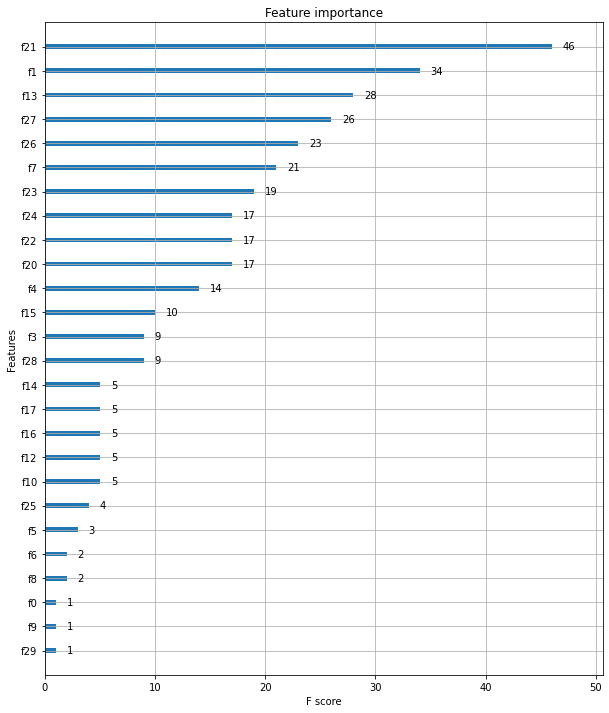

In [ ]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_wrapper, ax=ax)

### 2. **LightGBM**
- LightGBM의 가장 큰 장점은 XGBoost보다 학습에 걸리는 시간이 훨씬 적다는 점이다.
- LightGBM은 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할(Leaf Wise) 방식을 사용한다. 
- LightGBM의 리프 중심 트리 분할 방식은 트리의 균형을 맞추지 않고 최대 손실값을 가지는 리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고, 비대칭적인 규칙 트리가 생성된다. 
- 하지만 이렇게 최대 손실값을 가지는 리프 노드를 지속적으로 분할하여 생성된 규칙 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화할 수 있다는 것이 LightGBM의 구현 사상이다.
- 사이킷런 래퍼 LightGBM 클래스는 **분류**를 위한 **`LGBMClassifier`** 클래스와 **회귀**를 위한 **`LGBMRegressor`** 클래스이다.

### 2. **LightGBM**
### 2-1. LightGBM 하이퍼 파라미터
주요 파라미터
>- `num_iterations`[default=100]: 반복 수행하려는 트리의 개수를 지정한다. 크게 지정할수록 예측 성능이 높아질 수 있으나 너무 크게 지정하면 과적합으로 오히려 성능이 저하될 수 있다. LigthGBM 사이킷런 클래스에서는 n_estimators로 이름이 변경된다.
- `learning_rate`[default=0.1]: 0에서 1사이의 값을 지정하여 부스팅 스텝을 반복적으로 수행할 때 업데이트되는 학습률 값이다. 
- `max_depth`[defalut=1]: 트리 기반 알고리즘의 max_depth과 같은 것으로 0보다 작은 값을 지정하면 깊이에 제한이 없다. LightGBM은 리프 중심 기반이므로 깊이가 상대적으로 더 깊다.
- `min_data_in_leaf`[default=20]: 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수이며, 과적합을 제어하기 위한 파라미터이다. 사이킷런에서는 min_child_samples로 변경된다.
- `num_leaves`[default=31]: 하나의 트리가 가질 수 있는 최대 리프 개수이다.
- `boosting`[default=gbdt]: 부스팅의 트리를 생성하는 알고리즘을 기술한다.
- `bagging_fraction`[default=1.0]: 트리가 커져서 과적합되는 것을 제어하기 위해서 데이터를 샘플링하는 비율을 지정한다. 사이킷런에서는 subsample로 변경된다.
- `feature_l2`[default=0.0]: L2 regulation 제어를 위한 값으로, 피처 개수가 많을 경우에 적용을 검토하며 값이 클수록 과적합 감소 효과가 있다. 사이킷런에서는 reg_lambda로 변경된다.
- `lambda_l1`[default=0.0]: L1 regulation 제어를 위한 값으로, 과적합 제어를 위한 값이다. 사이킷런에서는 reg_alpha로 변경된다.

Learning Task 파라미터
> - `objective`: 최솟값을 가져야 할 손실함수를 지정한다. 회귀, 다중 클래스 분류, 이진 분류인지에 따라서 손실함수가 지정된다.

### 2. **LightGBM**
### 2-2. 하이퍼 파라미터 튜닝 방안
- num_leaves의 개수를 중심으로 min_child_samples(min_data_in_leaf), max_depth를 함께 조정하면서 모델의 복잡도를 줄이는 것이 기본 튜닝 방안이다.
- learning_rate를 작게 하면서 n_estimators를 크게 하는 부스팅 계열의 가장 기본적인 튜닝 방안을 적용하는 것도 좋다. 그러나 n_estimators를 너무 크게 하는 것은 과적합으로 오히려 성능을 저하시킬 수도 있음에 유의한다.
- 이외에도 과적합을 제어하기 위해 reg_lambda, reg_alpha와 같은 regularization을 적용하거나, 학습 데이터에 사용할 피처의 개수나 데이터 샘플링 레코드 개수를 죽이기 위해 colsample_bytree, subsample 파라미터를 적용할 수 있다.

### 2. **LightGBM**
### 2-3. LightGBM 적용 - 위스콘신 유방암 예측
- LightGBM의 파이썬 패키지인 lightgbm에서 **`LGBMClassifier`**를 임포트하여 사용한다.
- LightGBM도 조기 중단이 가능하므로, LGBMClassifier의 fit()에 조기 중단 관련 파라미터를 설정할 수 있다.
- 마찬가지로 **`plot_importance()`**를 사용하여 피처 중요도를 시각화할 수 있다.

In [ ]:
from lightgbm import LGBMClassifier

from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
ftr = dataset.data
target = dataset.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ftr, target, test_size=0.2, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators=400)

# 조기 중단 수행 가능
evals = [(X_test, y_test)]
lgbm_wrapper.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="logloss", eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

In [ ]:
# LightGBM 모델 예측 성능 평가
get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[33  4]
 [ 2 75]]
정확도: 0.9474, 정밀도: 0.9494, 재현율: 0.9740, F1: 0.9615, AUC: 0.9926


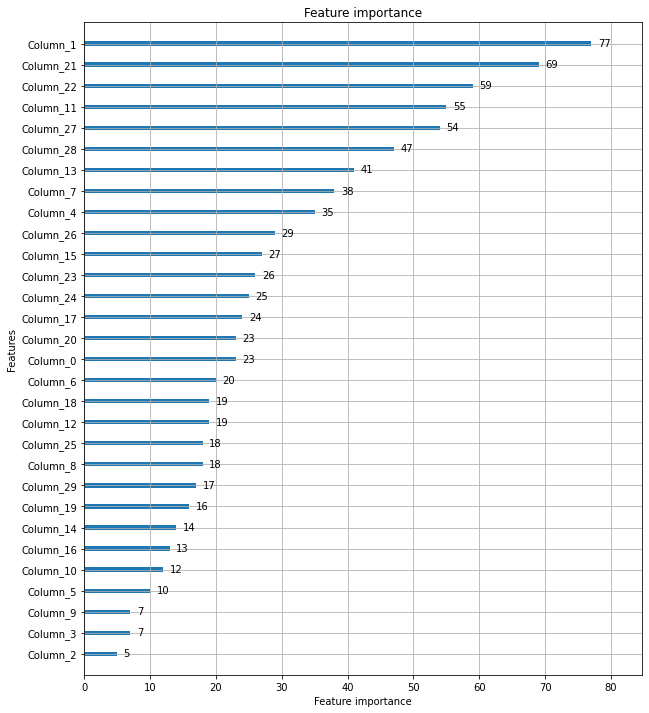

In [ ]:
# plot_importance()를 이용하여 피처 중요도를 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,12))
plot_importance(lgbm_wrapper, ax=ax)

### 3. **스태킹(Stacking) 앙상블**
- 스태킹(stacking)은 개별적인 여러 알고리즘을 서로 결합하여 예측 결과를 도출한다는 점에서 배깅 및 부스팅과 공통점이 있다.
- 가장 큰 차이점으로는 **개별 알고리즘으로 예측한 데이터를 기반으로 다시 예측을 수행**한다는 것이다.
- 즉 개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고, 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식이다.
- 스태킹 모델은 두 종류의 모델이 필요한데, **개별적인 기반 모델**과 이 **개별 기반 모델의 예측 데이터를 학습 데이터로 만들어서 학습하는 최종 메타 모델**이다.
- 스태킹 모델의 핵심은 여러 개별 모델의 **예측 데이터를 각각 스태킹 형태로 결합**해 최종 메타 모델의 **학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것**이다.

### 3. **스태킹(Stacking) 앙상블**
### 3-1. 기본 스태킹 모델 - 위스콘신 유방암 예측
- 스태킹에 사용될 머신러닝 알고리즘을 클래스를 생성한다. 
- 개별 모델은 KNN, 랜덤 포레스트, 결정 트리, 에이다부스트이며, 이들 모델의 예측 결과를 합한 데이터 세트로 학습/예측하는 최종 모델은 로지스틱 회귀이다.
- 개별 알고리즘으로부터 예측된 예측값을 칼럼 레벨로 옆으로 붙여서 피처 값으로 만들어서 최종 메타 모델인 로지스틱 회귀에서 학습 데이터로 다시 사용한다.

In [ ]:
cancer_data = load_breast_cancer()
X_data = cancer_data.data
y_label = cancer_data.target
X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

# 개별 ML 모델 생성
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 개별 ML 모델 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고, 개별 모델의 정확도 측정
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)

from sklearn.metrics import accuracy_score
print("KNN 정확도: {0:.4f}".format(accuracy_score(y_test, knn_pred)))
print("랜덤 포레스트 정확도: {0:.4f}".format(accuracy_score(y_test, rf_pred)))
print("결정 트리 정확도: {0:.4f}".format(accuracy_score(y_test, dt_pred)))
print("에이다부스트 정확도: {0:.4f}".format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정 트리 정확도: 0.9123
에이다부스트 정확도: 0.9561


In [ ]:
# 개별 알고리즘으로부터 예측된 예측값을 칼럼 레벨로 옆으로 붙여서 피처 값으로 만듦
import numpy as np
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용하여 행과 열의 위치를 교환하여 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [ ]:
# 스태킹으로 만들어진 데이터를 학습 및 예측할 최종 모델
from sklearn.linear_model import LogisticRegression
lr_final = LogisticRegression(C=10)

lr_final.fit(pred, y_test)
final = lr_final.predict(pred)
print("최종 메타 모델의 예측 정확도: {0:.4f}".format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도: 0.9737


### 3. **스태킹(Stacking) 앙상블**
### 3-2. CV 세트 기반의 스태킹
- CV 세트 기반의 스태킹 모델은 과적합을 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들 때 교차 검증 기반으로 예측된 결과 데이터 세트를 이용한다.
- 과적합 문제의 발생을 예방하기 위해 CV 세트 기반의 스태킹은 개별 모델들이 각각 교차 검증으로 메타 모델을 위한 학습용 스태킹 데이터 생성과 예측을 위한 테스트용 스태킹 데이터를 생성한 뒤, 이를 기반으로 메타 모델이 학습과 예측을 수행한다.
 - 스텝1: 각 **모델별**로 원본 학습/테스트 데이터를 예측한 결과값을 기반으로 메타 모델을 위한 학습용/테스트용 데이터를 생성한다.
 - 스텝2: 스텝1에서 개별 모델들이 생성한 학습용/테스트용 데이터를 모두 스태킹 형태로 합쳐서 메타 모델이 학습할 최종 학습용/테스트용 데이터 세트를 생성한다. 메타 모델은 최종적으로 생성된 학습 데이터 세트와 원본 학습 데이터의 레이블 데이터를 기반으로 학습한 뒤, 최종적으로 생성된 테스트 데이터 세트를 예측하고 원본 테스트 데이터의 레이블 데이터를 기반으로 평가한다. 

In [ ]:
# 스텝1 부분을 코드로 구현
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

#개별 기반 모델에서 최종 메타 모델이 사용할 학습 및 테스트 용 데이터를 생성하기 위한 함수
def get_stacking_base_dataset(model, X_train_n, y_train_n, X_test_n, n_folds) :
  #지정된 n_folds값으로 KFold 생성
  kf = KFold(n_splits = n_folds, shuffle = True, random_state = 0)
  train_fold_pred = np.zeros((X_train_n.shape[0],1))
  test_pred = np.zeros((X_test_n.shape[0],n_folds))
  print(model.__class__.__name__,'model 시작')

  for folder_counter, (train_index,valid_index) in enumerate(kf.split(X_train_n)) :
    print('\t 폴드 세트 :', folder_counter, '시작')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    model.fit(X_tr,y_tr)
    train_fold_pred[valid_index,:] = model.predict(X_te).reshape(-1,1)
    test_pred[:,folder_counter] = model.predict(X_test_n)
  
  test_pred_mean = np.mean(test_pred, axis = 1).reshape(-1,1)

  return train_fold_pred, test_pred_mean

### 3. **스태킹(Stacking) 앙상블**
### 3-2. CV 세트 기반의 스태킹
- 여러 개의 분류 모델별로 stack_base_model() 함수를 수행한다.
- 개별 모델은 앞의 기본 스태킹 모델에서 생성한 KNN, 랜덤 포레스트, 결정 트리, 에이다부스트 모델이며, 모델별로 get_stacking_base_datasets() 함수를 호출하여 각각 메타 모델이 추후에 사용할 학습용, 테스트용 데이터 세트를 반환한다.


In [ ]:
knn_train,knn_test = get_stacking_base_dataset(knn_clf,X_train,y_train,X_test,7)
rf_train,rf_test = get_stacking_base_dataset(rf_clf,X_train,y_train,X_test,7)
dt_train,dt_test = get_stacking_base_dataset(dt_clf,X_train,y_train,X_test,7)
ada_train,ada_test = get_stacking_base_dataset(ada_clf,X_train,y_train,X_test,7)

KNeighborsClassifier model 시작
	 폴드 세트 : 0 시작
	 폴드 세트 : 1 시작
	 폴드 세트 : 2 시작
	 폴드 세트 : 3 시작
	 폴드 세트 : 4 시작
	 폴드 세트 : 5 시작
	 폴드 세트 : 6 시작
RandomForestClassifier model 시작
	 폴드 세트 : 0 시작
	 폴드 세트 : 1 시작
	 폴드 세트 : 2 시작
	 폴드 세트 : 3 시작
	 폴드 세트 : 4 시작
	 폴드 세트 : 5 시작
	 폴드 세트 : 6 시작
DecisionTreeClassifier model 시작
	 폴드 세트 : 0 시작
	 폴드 세트 : 1 시작
	 폴드 세트 : 2 시작
	 폴드 세트 : 3 시작
	 폴드 세트 : 4 시작
	 폴드 세트 : 5 시작
	 폴드 세트 : 6 시작
AdaBoostClassifier model 시작
	 폴드 세트 : 0 시작
	 폴드 세트 : 1 시작
	 폴드 세트 : 2 시작
	 폴드 세트 : 3 시작
	 폴드 세트 : 4 시작
	 폴드 세트 : 5 시작
	 폴드 세트 : 6 시작


In [ ]:
# 스텝2 부분을 코드로 구현
# get_stacking_base_datasets() 호출로 반환된 각 모델별 학습 데이터와 테스트 데이터를 합친다
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print("원본 학습 피처 데이터 Shape:", X_train.shape, "원본 테스트 피처 Shape:", X_test.shape)
print("스태킹 학습 피처 데이터 Shape:", Stack_final_X_train.shape, "스태킹 테스트 피처 데이터 Shape:", Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


### 3. **스태킹(Stacking) 앙상블**
### 3-2. CV 세트 기반의 스태킹
- 만들어진 Stack_final_X_train은 **메타 모델이 학습할 학습용 피처 데이터** 세트이다.
- 만들어진 Stack_final_X_test는 **메타 모델이 예측할 테스트용 피처 데이터** 세트이다.
- 최종 메타 모델인 로지스틱 회귀를 스태킹된 학습용 피처 데이터 세트(Stack_final_X_train)와 원본 학습 레이블 데이터(y_train)로 **학습**한 후에 스태킹된 테스트 데이터 세트(Stack_final_X_test)로 **예측**하고, 예측 결과를 원본 테스트 레이블 데이터와 비교하여 정확도를 측정한다.

In [ ]:
# 로지스틱 회귀 메타 모델 학습 및 예측
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print("최종 메타 모델의 예측 정확도: {0:.4f}".format(accuracy_score(y_test, stack_final)))

최종 메타 모델의 예측 정확도: 0.9737


### 4. 정리
- 대부분의 **앙상블 기법**은 결정 트리 기반의 다수의 약한 학습기를 결합하여 변동성을 줄여 예측 오류를 줄이고 성능을 개선한다.
- **결정 트리** 알고리즘은 정보의 균일도에 기반한 규칙 트리를 만들어서 예측을 수행한다.
- 앙상블 기법은 대표적으로 배깅과 부스팅으로 구분될 수 있다.
- **배깅** 방식은 학습 데이터를 중복 허용하면서 다수의 세트로 샘플링하여 이를 다수의 약한 학습기가 학습한 뒤 최종 결과를 결합하여 예측하는 방식이다.
 - 대표적으로는 수행시간이 빠르고 비교적 안정적인 예측 성능을 제공하는 **랜덤 포레스트**가 있다.

- **부스팅** 방식은 학습기들이 순차적으로 학습을 진행하면서 예측이 틀린 데이터에 대해서는 가중치를 부여하여 다음번 학습기가 학습할 때에는 이전에 예측이 틀린 데이터에 대해서는 보다 높은 정확도로 예측할 수 있게 한다.
 - 대표적으로는 **GBM**이 있는데 예측 성능은 뛰어나지만 수행 시간이 너무 오래 걸린다는 단점이 있다.
 - **XGBoost**와 **LightGBM**은 현재 가장 각광을 받고 있는 부스팅 기반 머신러닝 패키지이다.
 - 이들의 사이킷런 래퍼 클래스를 이용하면 여타 다른 Estimator 클래스와 동일한 방식으로 학습과 예측을 수행할 수 있다.

- **스태킹**은 여러 개의 개별 모델들이 생성한 예측 데이터를 기반으로 최종 메타 모델이 학습할 별도의 학습 데이터 세트와 예측할 테스트 데이터 세트를 재생성하는 기법이다.
- 스태킹 모델의 핵심은 바로 메타 모델이 사용할 학습 데이터 세트와 예측 데이터 세트를 개별 모델의 예측 값들을 스태킹 형태로 결합하여 생성하는 것이다.
